In [2]:
# Numpy imports:
import numpy as np

#Scipy imports
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

# for extracting filenames
import glob

# skimage submodules we need
import skimage.io
import skimage.measure
import skimage.filters
import skimage.exposure
import skimage.morphology
from skimage.registration import phase_cross_correlation

#For identifying aster center
from skimage.filters import threshold_otsu, gaussian
from skimage.measure import regionprops
import cv2

#Matplotlib imports
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# # Seaborn imports (stylistic for nice plots)
# import seaborn as sns
# rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
#     'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
# sns.set(style='ticks', rc=rc)

#for DataFrames
import pandas as pd

#To interact with the operating system
import os

#For status bar 
from tqdm.notebook import tqdm as tqdm

In [7]:
stand_conc = np.array([0, 12.5, 25, 31.25, 37.5, 50]) #µM
stand_abs = np.array([0.23, 0.337, 0.452, 0.518, 0.574, 0.598]) #absorbance values

iLid = [0.885, 0.825]
iLid_nomt = 0.395
micro = [0.679, 0.655]
micro_nomt = 0.384
just_mt = 0.375
blank = 0.351

m = 0.0092, b = 0.226


Text(0, 0.5, 'Absorbance at 620 nm')

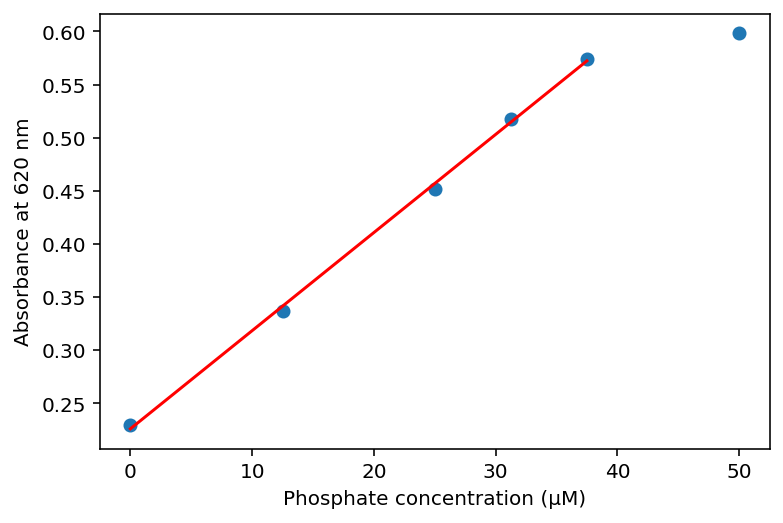

In [15]:
m, b = np.polyfit(stand_conc[:-1], stand_abs[:-1], 1)
print('m = ' + str(round(m,4)) + ', b = ' + str(round(b,4)))
plt.plot(stand_conc[:-1], m*stand_conc[:-1] + b, 'r-', label = 'Fit to Average')
plt.scatter(stand_conc, stand_abs)
plt.xlabel('Phosphate concentration (µM)')
plt.ylabel('Absorbance at 620 nm')

In [24]:
iLid_bs = iLid[0] - iLid_nomt
iLid_pconc = (iLid_bs - b)/m

micro_bs = micro[0] - micro_nomt
micro_pconc = (micro_bs - b)/m
micro_pconc

7.471425369789324

In [26]:
Rv = 40 #µl
Sv = 0.5 #ul
T = 36*60 #seconds
iLid_conc = 25*Sv/Rv #uM in Rxn
micro_conc = 34*Sv/Rv

iLid_rate = (iLid_pconc)/(T*iLid_conc)
micro_rate = (micro_pconc)/(T*micro_conc)
print(iLid_rate, micro_rate)

0.04236183740890148 0.008138807592363097
